In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os
import torch
import cv2
import sys
import json
from PIL import Image
from tqdm import tqdm

from torch.utils.data import Dataset, DataLoader

import albumentations as A
from albumentations.pytorch import ToTensorV2
import segmentation_models_pytorch as smp

from dataset import *

# %matplotlib inline
%config InlineBackend.figure_format = 'retina'
print(f"Pytorch Version:[{torch.__version__}]")
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"device:[{device}]")

Number of super categories: 11
Number of categories: 11
Number of annotations: 21116
Number of images: 2617
Pytorch Version:[1.7.1]
device:[cuda:0]


In [4]:
dataset_path = '/opt/ml/input/data'
train_path = dataset_path + '/train.json'
val_path = dataset_path + '/val.json'

In [7]:
IMAGE_SIZE = 256

In [14]:
def collate_fn(batch):
    return tuple(zip(*batch))

# 0. Normal image
transform = A.Compose([
    A.Resize(IMAGE_SIZE, IMAGE_SIZE),
    ToTensorV2()
])

# 1. Only ElasticTransform
elastic_transform = A.Compose([
        A.Resize(IMAGE_SIZE, IMAGE_SIZE),
        A.ElasticTransform(alpha=120, sigma=120 * 0.05, alpha_affine=120 * 0.03),
#         A.Normalize(),
        ToTensorV2()
])

# 2. Elastic Transform + GridDistortion
grid_transform = A.Compose([
        A.Resize(IMAGE_SIZE, IMAGE_SIZE),
#         A.OneOf([
#             A.ElasticTransform(p=1),
#             A.GridDistortion(p=1)
#         ], p=0.4),
        A.GridDistortion(p=1),
#         A.Normalize(),
        ToTensorV2()
])

# 3. Elastic Transform + RandomGridShuffle
grid_transform = A.Compose([
        A.Resize(IMAGE_SIZE, IMAGE_SIZE),
#         A.OneOf([
#             A.ElasticTransform(p=1),
#             A.RandomGridShuffle(p=1)
#         ], p=0.4),
        A.RandomGridShuffle(p=1),
#         A.Normalize(),
        ToTensorV2()
])

# define transform
clahe_transform = A.Compose([
    A.Resize(IMAGE_SIZE, IMAGE_SIZE),
    A.CLAHE(p=1),
#     A.Normalize(),
    ToTensorV2()
])

In [20]:
dataset = CustomDataLoader(data_dir=train_path, mode='train', transform=transform)

loading annotations into memory...
Done (t=3.93s)
creating index...
index created!


In [33]:
image, label, info = elastic_dataset[0]
image.shape

torch.Size([3, 256, 256])

In [34]:
img = elastic_transform(image=image.numpy())

In [37]:
img['image'].shape

torch.Size([256, 256, 256])

In [16]:
image, label, info = elastic_dataset[0]

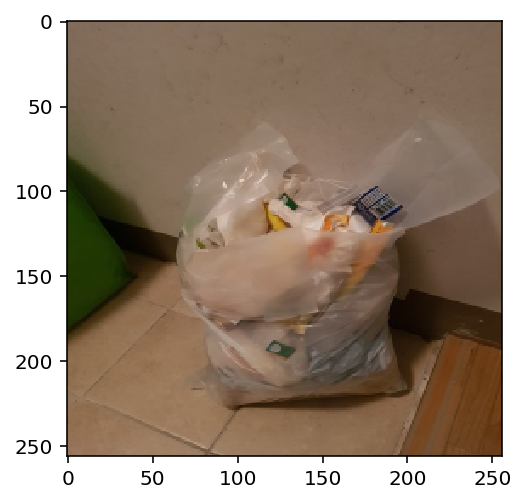

In [17]:
plt.imshow(image.permute([1, 2, 0]))